In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [6]:
#Load the data set
data = pd.read_csv("/content/Titanic_test.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.shape

(418, 11)

In [7]:
# Display information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [10]:
# Summary statistics for numerical features
print(data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [11]:
# Feature types
print(data.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


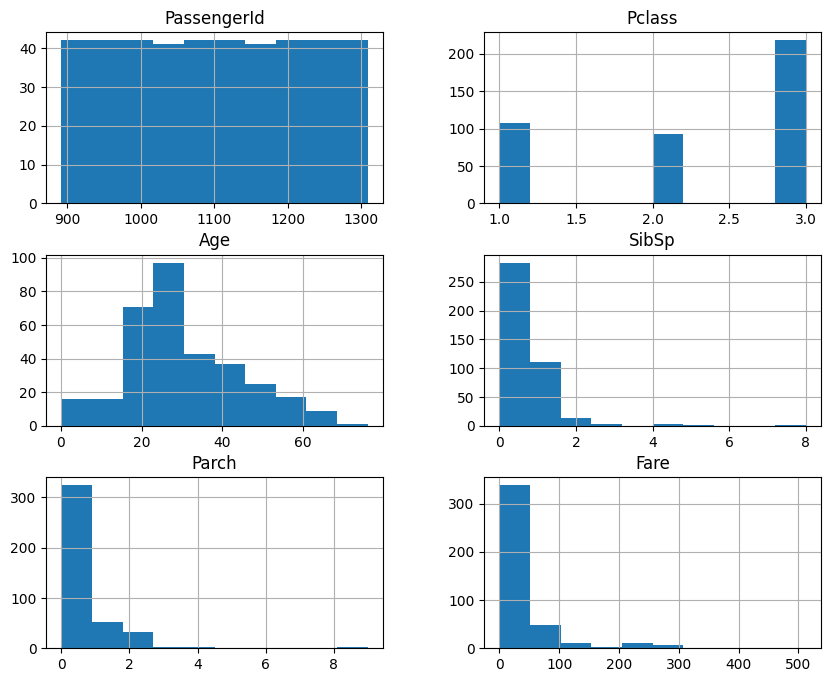

In [23]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
data.hist(figsize=(10, 8))
plt.show()


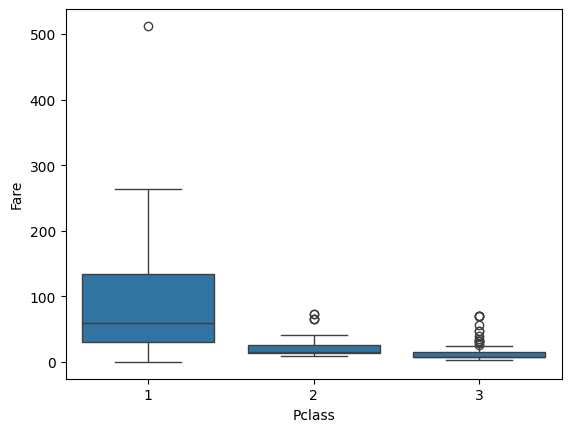

In [24]:
import seaborn as sns

# Box plot for Fare
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.show()


In [25]:
# Fill missing values for Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values for Cabin with 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)


In [26]:
# Encoding Sex (male/female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for Embarked
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [30]:
# Display the column names
print(data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [34]:
data['Cabin'].unique()

array(['Unknown', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78',
       'D34', 'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61',
       'C53', 'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46',
       'C116', 'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97',
       'D22', 'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34',
       'C62 C64', 'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21',
       'C89', 'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [64]:

# Select the relevant columns
columns_of_interest = ['Sex', 'Age', 'SibSp', 'Parch']

# Create a new DataFrame with these columns
new_data = data[columns_of_interest]

# Display the new DataFrame
print(new_data.head())

   Sex   Age  SibSp  Parch
0    0  34.5      0      0
1    1  47.0      1      0
2    0  62.0      0      0
3    0  27.0      0      0
4    1  22.0      1      1


In [56]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [65]:
# Dividing our data into input and output variables

X = new_data.iloc[:,0:] # Indepedendent variable set - CLMSEX	CLMINSUR	SEATBELT	CLMAGE	LOSS
Y = data.iloc[:,1] # Dependent variable set - ATTORNEY

In [66]:
X

,Sex,Age,SibSp,Parch
0,0,34.5,0,0
1,1,47.0,1,0
2,0,62.0,0,0
3,0,27.0,0,0
4,1,22.0,1,1
...,...,...,...,...
413,0,27.0,0,0
414,1,39.0,0,0
415,0,38.5,0,0
416,0,27.0,0,0


In [68]:
#Logistic regression and fit the model
classifier = LogisticRegression() # initialize the model i.e. called instance creation of class object.
# First create object 'classifier' for class LogisticRegression
classifier.fit(X,Y) # Then use this object to fit the model. This is the std methodology to build any algo. in sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
LogisticRegression()

LogisticRegression()

In [70]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [71]:
y_pred # y hat values for x

array([3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,

In [72]:
y_pred_df= pd.DataFrame({'Y': Y,
                         'Yhat': classifier.predict(X)})

In [73]:
y_pred_df

,Y,Yhat
0,3,3
1,3,1
2,2,1
3,3,3
4,3,3
...,...,...
413,3,3
414,1,1
415,3,3
416,3,3


In [74]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[ 60   0  47]
 [ 17   0  76]
 [ 12   0 206]]


In [76]:
(60+206)/(60+47+17+76)*100

133.0

In [77]:
# ROC Curve

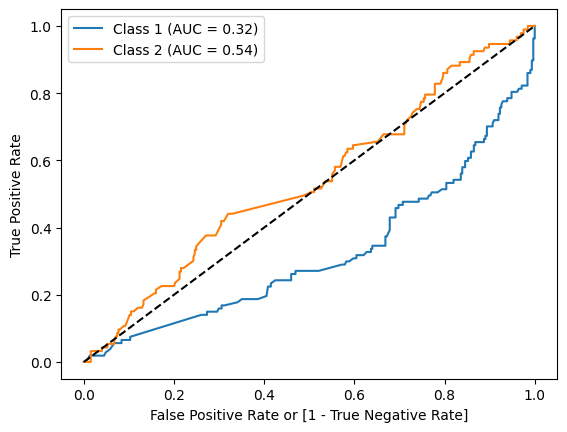

In [81]:
!pip install numpy
import numpy as np  # Import NumPy

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'Y' is your true labels and 'X' is your feature data
y_probs = classifier.predict_proba(X)

# Iterate over each class to calculate ROC curve individually
for i in range(y_probs.shape[1]):
    # Check for single class in y_true for the current class
    if len(np.unique(Y == i)) == 2:  # Check if both classes are present
        fpr, tpr, thresholds = roc_curve(Y, y_probs[:, i], pos_label=i)
        auc = roc_auc_score(Y == i, y_probs[:, i])  # Calculate AUC for the current class
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')
    else:
        print(f"Warning: Only one class present in y_true for class {i}. Skipping ROC AUC calculation.")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()